In [1]:
import numpy as np
import numpy.random as rd
import scipy.stats as st
import matplotlib.pyplot as plt

**Exercise 1**

a) Gaussian distribution

In [2]:
est_1 = np.array([])
est_2 = np.array([])
est_3 = np.array([])
est_4 = np.array([])

for i in range(1, 10000):
    h = rd.normal(170, 10, (10,))
    est_1 = np.append(est_1, np.mean(h))
    est_2 = np.append(est_2, np.median(h))
    est_3 = np.append(est_3, st.gmean(h))
    est_4 = np.append(est_4, st.mode(h))

print("I: Bias = {:.3f}, Variance = {:.3f}".format(np.mean(est_1) - 170, np.var(est_1)))
print("II: Bias = {:.3f}, Variance = {:.3f}".format(np.mean(est_2) - 170, np.var(est_2)))
print("III: Bias = {:.3f}, Variance = {:.3f}".format(np.mean(est_3) - 170, np.var(est_3)))
print("IV: Bias = {:.3f}, Variance = {:.3f}".format(np.mean(est_4) - 170, np.var(est_4)))

I: Bias = 0.011, Variance = 9.774
II: Bias = 0.021, Variance = 13.412
III: Bias = -0.255, Variance = 9.819
IV: Bias = -92.203, Variance = 5914.738


b) Uniform distribution

In [3]:
est_1 = np.array([])
est_2 = np.array([])
est_3 = np.array([])
est_4 = np.array([])

for i in range(1, 10000):
    h = rd.uniform(165, 175, (10,))
    est_1 = np.append(est_1, np.mean(h))
    est_2 = np.append(est_2, np.median(h))
    est_3 = np.append(est_3, st.gmean(h))
    est_4 = np.append(est_4, st.mode(h))

print("I: Bias = {:.3f}, Variance = {:.3f}".format(np.mean(est_1) - 170, np.var(est_1)))
print("II: Bias = {:.3f}, Variance = {:.3f}".format(np.mean(est_2) - 170, np.var(est_2)))
print("III: Bias = {:.3f}, Variance = {:.3f}".format(np.mean(est_3) - 170, np.var(est_3)))
print("IV: Bias = {:.3f}, Variance = {:.3f}".format(np.mean(est_4) - 170, np.var(est_4)))

I: Bias = -0.008, Variance = 0.841
II: Bias = -0.007, Variance = 1.923
III: Bias = -0.030, Variance = 0.841
IV: Bias = -86.553, Variance = 6797.818


**Exercise 2**

a) See pdf.

b) + c)

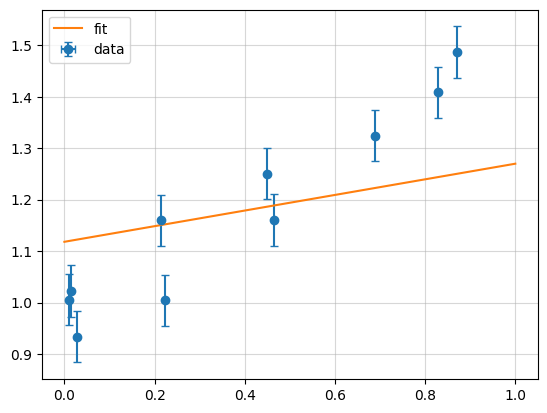

Bias = -0.407


In [11]:
def estimate(n, a, b, sigma_x, sigma_y, plot = True):
    f = lambda x: a*x + b
    A, B = np.array([]), np.array([])

    for i in range(1, 1000):
        x = rd.uniform(0, 1, (n,)) + rd.normal(0, sigma_x, (n,))
        y = f(x) + rd.normal(0, sigma_y, (n,))
        S_x = sum(x); S_y = sum(y)
        S_xx = sum(x*y); S_xy = sum(x*y)
        A = np.append(A, (n*S_xy - S_x*S_y) / (n*S_xx - S_x**2))
        B = np.append(B, (S_xx*S_y - S_x*S_xy) / (n*S_xx - S_x**2))

    if plot:
        plt.errorbar(x, y, sigma_y, sigma_x, marker = 'o', ls = '', capsize = 3, label = "data")
        x_fit = np.linspace(-2*sigma_x, 1+2*sigma_x, 100)
        plt.plot(x_fit, A[-1]*x_fit + B[-1], c = "tab:orange", label = "fit")
        plt.grid(alpha = 0.5); plt.legend()
        plt.show()
    
    return A, B

n = 10
a, b = 0.5, 1
sigma_y = 0.05

A, B = estimate(n, a, b, 0, sigma_y)
print("Bias = {:.3f}".format(np.mean(A) - 0.5))

This shows that the estimator is biased.

d)

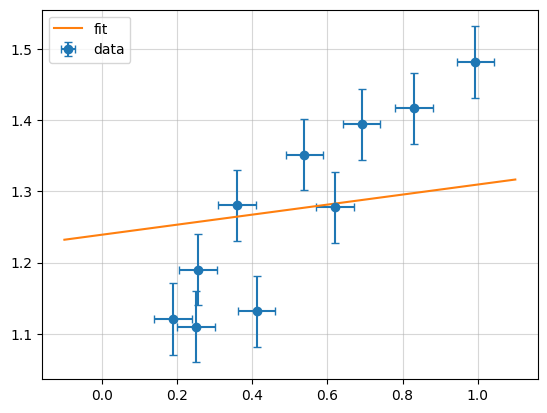

Bias = -0.405


In [12]:
n = 10
a, b = 0.5, 1
sigma_x, sigma_y = 0.05, 0.05

A, B = estimate(n, a, b, sigma_x, sigma_y)
print("Bias = {:.3f}".format(np.mean(A) - 0.5))

The bias is approximately the same as before.

e)

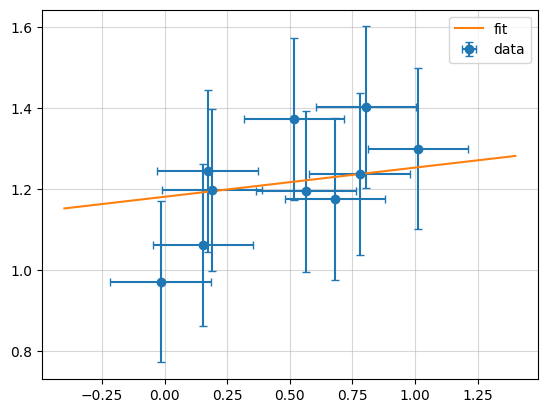

Bias = -0.369


In [13]:
n = 10
a, b = 0.5, 1
sigma_x, sigma_y = 0.2, 0.2

A, B = estimate(n, a, b, sigma_x, sigma_y)
print("Bias = {:.3f}".format(np.mean(A) - 0.5))

The absolute value of the bias has decreased. This trend continues if the uncertainties are increased further, but at some point it starts to fluctuate strongly.

f) + g)

In [20]:
a, b = 0.5, 1
sigma_x, sigma_y = 0.2, 0.2

for n in [10,20,50,100,200,500,1000]:
    A, B = estimate(n, a, b, sigma_x, sigma_y, plot = False)
    print("n = {}: Bias = {:.3f}".format(n, np.mean(A) - 0.5))

n = 10: Bias = -0.371
n = 20: Bias = -0.367
n = 50: Bias = -0.360
n = 100: Bias = -0.360
n = 200: Bias = -0.360
n = 500: Bias = -0.359
n = 1000: Bias = -0.359
n = 2000: Bias = -0.359
n = 5000: Bias = -0.359


The bias does not decrease significantly with increased $n$, indicating the estimator is neither consistent nor asymptotically unbiased.